LeveneResult(statistic=2.23639285865642, pvalue=0.1349271874358367)
t-test Ttest_indResult(statistic=1.739500051509261, pvalue=0.04103781796979767)
t-test Ttest_indResult(statistic=1.9906855981796339, pvalue=0.025901076701673117)
t-test Ttest_indResult(statistic=1.3046092191451777, pvalue=0.0963771043887324)
t-test Ttest_indResult(statistic=4.645267399098214, pvalue=0.002108525780538078)


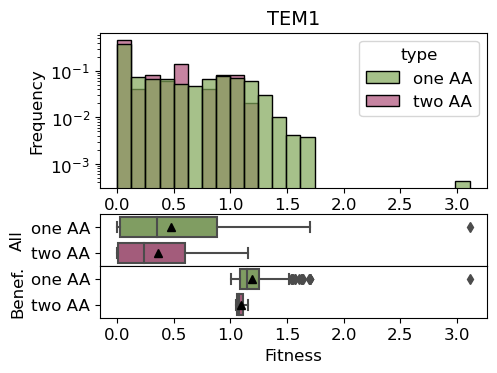

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene

# Define font sizes for the plot
SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

# Configure the plot font sizes using matplotlib settings
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


data=pd.read_csv("../../../Data_TEM1/data_TEM1_Codon_Substitutions.csv")
dataCrossCodons=pd.read_csv("../../../Data_TEM1/data_TEM1_CrossCodonsDoubles.csv")


data = data.dropna(subset=['mutation'])


data = data[data['mutation'] == 'double']
data['mutation'] = data['mutation'].replace({'double': 'one AA'})


data = pd.concat([data, dataCrossCodons], ignore_index=True)
data['mutation'] = data['mutation'].replace({'double': 'two AA'})


data = data[data['fitness'] != 'unknown']
data['fitness'] = data['fitness'].astype(float)


#####################################################
#####################################################

data.rename(columns={'mutation':'type'}, inplace = True)


##########################################################################################

fitness_one_AA = data[data['type'] == 'one AA']['fitness'].tolist()
fitness_two_AA = data[data['type'] == 'two AA']['fitness'].tolist()

filtered_fitness_one_AA = [num for num in fitness_one_AA if num > 1]
filtered_fitness_two_AA = [num for num in fitness_two_AA if num > 1]


print(levene(fitness_one_AA, fitness_two_AA))

#print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=True, alternative="greater", trim=0.1))
#print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=False, alternative="greater", trim=0.1))

print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=True, alternative="greater"))
print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=False, alternative="greater"))

print("t-test", stats.ttest_ind(filtered_fitness_one_AA,filtered_fitness_two_AA, equal_var=True, alternative="greater"))
print("t-test", stats.ttest_ind(filtered_fitness_one_AA,filtered_fitness_two_AA, equal_var=False, alternative="greater"))

##########################################################################################

# create a figure with two subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(5, 3.7), gridspec_kw={'height_ratios': [3, 0.5,1,1], "hspace":0},)

# create a histogram using seaborn
sns.histplot(data=data, x="fitness", hue="type", palette=["#80a758", "#af5079"], log_scale=(False, True),hue_order=['one AA', 'two AA'],stat='probability', alpha=0.7, common_norm=False, legend=True, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Frequency')
ax1.set_title('TEM1')

ax2.axis("off")

sns.boxplot(data=data, x="fitness", y="type", palette=["#80a758", "#af5079"], order=['one AA', 'two AA'], showmeans=True, meanprops={"markerfacecolor":"black", "markeredgecolor":"black"}, ax=ax3,)

xmin, xmax = ax1.get_xlim()
ax3.set_xlim([xmin, xmax])
ax3.set_xlabel('')
ax3.set_ylabel('All')


data = data[data['fitness'] > 1]
sns.boxplot(data=data, x="fitness", y="type", palette=["#80a758", "#af5079"], order=['one AA', 'two AA'], showmeans=True, meanprops={"markerfacecolor":"black", "markeredgecolor":"black"}, ax=ax4,)
xmin, xmax = ax1.get_xlim()
ax4.set_xlim([xmin, xmax])
ax4.set_xlabel('Fitness')
ax4.set_ylabel('Benef.')


#plt.savefig("One_vs_Two_AA.pdf", bbox_inches = "tight")

plt.show()

LeveneResult(statistic=2.23639285865642, pvalue=0.1349271874358367)
t-test Ttest_indResult(statistic=1.739500051509261, pvalue=0.04103781796979767)
t-test Ttest_indResult(statistic=1.9906855981796339, pvalue=0.025901076701673117)
t-test Ttest_indResult(statistic=1.3046092191451777, pvalue=0.0963771043887324)
t-test Ttest_indResult(statistic=4.645267399098214, pvalue=0.002108525780538078)
0.825


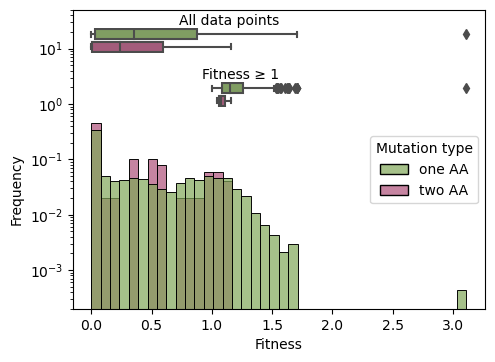

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene


data=pd.read_csv("../../../Data_TEM1/data_TEM1_Codon_Substitutions.csv")
dataCrossCodons=pd.read_csv("../../../Data_TEM1/data_TEM1_CrossCodonsDoubles.csv")


data = data.dropna(subset=['mutation'])


data = data[data['mutation'] == 'double']
data['mutation'] = data['mutation'].replace({'double': 'one AA'})


data = pd.concat([data, dataCrossCodons], ignore_index=True)
data['mutation'] = data['mutation'].replace({'double': 'two AA'})


data = data[data['fitness'] != 'unknown']
data['fitness'] = data['fitness'].astype(float)


#####################################################
#####################################################

data.rename(columns={'mutation':'type'}, inplace = True)


##########################################################################################
fitness_one_AA = data[data['type'] == 'one AA']['fitness'].tolist()
fitness_two_AA = data[data['type'] == 'two AA']['fitness'].tolist()
filtered_fitness_one_AA = [num for num in fitness_one_AA if num > 1]
filtered_fitness_two_AA = [num for num in fitness_two_AA if num > 1]

filtered_data = data[data['fitness'] > 1]


print(levene(fitness_one_AA, fitness_two_AA))

#print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=True, alternative="greater", trim=0.1))
#print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=False, alternative="greater", trim=0.1))

print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=True, alternative="greater"))
print("t-test", stats.ttest_ind(fitness_one_AA,fitness_two_AA, equal_var=False, alternative="greater"))

print("t-test", stats.ttest_ind(filtered_fitness_one_AA,filtered_fitness_two_AA, equal_var=True, alternative="greater"))
print("t-test", stats.ttest_ind(filtered_fitness_one_AA,filtered_fitness_two_AA, equal_var=False, alternative="greater"))

##########################################################################################


# Create a new figure for the histogram without a title and grid
fig, ax_main = plt.subplots(figsize=(5, 3.6))

# Adjust subplots
plt.subplots_adjust(
    left=None,  # Adjust if necessary
    bottom=0.12,  # Adjust if necessary, especially if the x-label is cut off
    right=0.95,  # Adjust if necessary
    top=0.95,  # Decrease this to reduce space at the top of the figure
    wspace=None,  # Adjust the width of the space between subplots
    hspace=None   # Adjust the height of the space between subplots
)


# Main histogram plot with visible axes
sns.histplot(data=data, x="fitness", hue="type", bins=40, palette=["#80a758", "#af5079"],
             log_scale=(False, True), hue_order=['one AA', 'two AA'], stat='probability', legend=True,
             alpha=0.7, common_norm=False, ax=ax_main)

# Adjust the legend position
legend = ax_main.get_legend()
legend.set_title("Mutation type")
legend.set_frame_on(True)
legend.set_bbox_to_anchor((1, 0.6))  # Adjust x and y for precise positioning


# Dynamically get the position of the histogram
pos = ax_main.get_position()
left, width = pos.x0, pos.width

# Customization and cleaning
ax_main.grid(False)  # Remove grid
ax_main.set_ylim(2*10**(-4), 50)  # Custom y-axis range

# Adding box plots
def add_boxplot(ax, data, pos, height=0.07, title="", y_title_offset=0.0, x_title_offset=1.0):
    # pos is in the form [left, bottom, width, height]
    ax_box = fig.add_axes([pos[0], pos[1], pos[2], height], frame_on=False)
    sns.boxplot(data=data, x="fitness", y="type", palette=["#80a758", "#af5079"], order=['one AA', 'two AA'],
                showmeans=False, meanprops={"markerfacecolor": "black", "markeredgecolor": "black"}, ax=ax_box)
    ax_box.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])
    ax_main.set_xlabel("Fitness")
    ax_main.set_ylabel('Frequency')
    ax_main.yaxis.label.set_position((0, 0.4))  # Adjust the main y-axis label position
    ax_box.xaxis.set_visible(False)
    ax_box.yaxis.set_visible(False)
    ax_box.set_xlim(ax.get_xlim())
    ax_box.text(x_title_offset, 1 + y_title_offset, title, fontsize=10, transform=ax_box.transAxes, verticalalignment='bottom', horizontalalignment='right')

# Adding box plots with adjusted titles
add_boxplot(ax_main, data, pos=[left, 0.83, width], height=0.07, title="All data points", y_title_offset=0., x_title_offset=0.5)
add_boxplot(ax_main, filtered_data, pos=[left, 0.68, width], height=0.07, title="Fitness \u2265 1", y_title_offset=0., x_title_offset=0.5)

print(width)

# Save and show the plot
plt.savefig("TEM1_Dist.pdf")

plt.show()
